### aim: use monitorRobot breakdown csvs to tell us some stuff about carbon flux spinup

run `mm` and then `robot` to refresh breakdowns

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
mod = {
    
    'TOM12_TJ_GPA2' : {
        'desc': 'TOM12 era2 ',
        'color' : 'k',
        'linestyle': ':'},
    'TOM12_TJ_GPA1' : {
        'desc': 'era2 | co2 DYN | clim DYN | 1947 rest.',
        'color' : 'darkgray',
        'linestyle': ':'},    
    'TOM12_TJ_GPB0' : {
        'desc': 'ncep | co2 STAT | clim DYN | 1947 rest.',
        'color' : 'indigo',
        'linestyle': ':'},  
    'TOM12_TJ_GPB1' : {
        'desc': 'era2 | co2 STAT | clim DYN | 1749 rest.',
        'color' : 'mediumorchid',
        'linestyle': ':'},  
    'TOM12_TJ_GNB0' : {
        'desc': 'ncep | co2 STAT | clim DYN | 1947 rest.',
        'color' : 'pink',
        'linestyle': ':'},
    'TOM12_TJ_GPA4' : {
        'desc': 'CAL12 era2 | co2 DYN | clim DYN | 1749 rest.',
        'color' : 'k',
        'linestyle': '-'},
    'TOM12_TJ_GPB3' : {
        'desc': 'era2 | co2 STAT | clim DYN | 1749 rest.',
        'color' : 'mediumorchid',
        'linestyle': '-'},      

    'TOM12_TJ_GEA0' : {
        'desc': 'TOM12 A',
        'color' : 'r',
        'linestyle': '--'},  
    'TOM12_TJ_GEB0' : {
        'desc': 'TOM12 B',
        'color' : 'y',
        'linestyle': '--'},  
    'TOM12_TJ_GEC0' : {
        'desc': 'TOM12 C',
        'color' : 'b',
        'linestyle': '--'},  
    'TOM12_TJ_GED0' : {
        'desc': 'TOM12 D',
        'color' : 'g',
        'linestyle': '--'},  

    'TOM12_TJ_GEA1' : {
        'desc': 'CAL12 | era2 | co2 DYN | clim DYN | s-u GPA4',
        'color' : 'r',
        'linestyle': '-'},  
    'TOM12_TJ_GEB1' : {
        'desc': 'CAL12 | era2 | co2 STAT | clim BIAS | s-u GPB3',
        'color' : 'y',
        'linestyle': '-'},  
    'TOM12_TJ_GEC1' : {
        'desc': 'CAL12 | era2 | co2 DYN | clim BIAS | s-u GPA4',
        'color' : 'b',
        'linestyle': '-'},  
    'TOM12_TJ_GED1' : {
        'desc': 'CAL12 | era2 | co2 STAT | clim DYN | s-u GPB3',
        'color' : 'g',
        'linestyle': '-'},  
    
    'TOM12_DW_GA01' : {
        'desc': 'GCB 2022 (ncep) | co2 DYN | clim DYN ',
        'color' : 'r',
        'linestyle': ':'},  
    'TOM12_DW_GB01' : {
        'desc': 'GCB 2022 (ncep) | co2 STAT | clim BIAS ',
        'color' : 'y',
        'linestyle': ':'},  
    'TOM12_DW_GC01' : {
        'desc': 'GCB 2022 (ncep) | co2 DYN | clim BIAS',
        'color' : 'b',
        'linestyle': ':'},  
    'TOM12_DW_GD01' : {
        'desc': 'GCB 2022 (ncep) | co2 STAT | clim DYN',
        'color' : 'g',
        'linestyle': ':'},  
    
    'TOM12_TJ_CGA1' : {
        'desc': 'GCB 2022 (ncep) | co2 DYN | clim DYN ',
        'color' : 'r',
        'linestyle': ':'},  
    'TOM12_TJ_CGB1' : {
        'desc': 'GCB 2022 (ncep) | co2 STAT | clim BIAS ',
        'color' : 'y',
        'linestyle': ':'},  
    'TOM12_TJ_CGC1' : {
        'desc': 'GCB 2022 (ncep) | co2 DYN | clim BIAS',
        'color' : 'b',
        'linestyle': ':'},  
    'TOM12_TJ_CGD1' : {
        'desc': 'GCB 2022 (ncep) | co2 STAT | clim DYN',
        'color' : 'g',
        'linestyle': ':'},  
    'TOM12_DW_WE43' : {
        'desc': 'era | co2 DYN | clim DYN',
        'color' : 'darkcyan',
        'linestyle': '--'}, 
    'TOM12_TJ_1ASA' : {
        'desc': 'ukesm | co2 DYN | clim DYN',
        'color' : 'hotpink',
        'linestyle': '--'}, 
    'TOM12_TJ_GNA6' : {
        'desc': 'NCEP spinup CAL12 | co2 DYN | clim DYN',
        'color' : 'darksalmon',
        'linestyle': '--'}, 
    'TOM12_TJ_RV02' : {
        'desc': 'ERA spinup RIV12 ',
        'color' : 'r',
        'linestyle': '-'}, 
    'TOM12_TJ_RV06' : {
        'desc': 'ERA spinup RIV12 ',
        'color' : 'r',
        'linestyle': '-'}, 
    'TOM12_TJ_1AP1' : {
        'desc': 'CAL12-GEL NCEP spinup',
        'color' : 'chartreuse',
        'linestyle': '-'}, 

    'TOM12_TJ_RVA0' : {
        'desc': 'RIV12 A',
        'color' : 'r',
        'linestyle': 'dashdot'}, 
    'TOM12_TJ_RVB0' : {
        'desc': 'RIV12 B',
        'color' : 'y',
        'linestyle': 'dashdot'}, 
    'TOM12_TJ_RVC0' : {
        'desc': 'RIV12 C',
        'color' : 'b',
        'linestyle': 'dashdot'}, 
    'TOM12_TJ_RVD0' : {
        'desc': 'RIV12 D',
        'color' : 'g',
        'linestyle': 'dashdot'}, 
    'TOM12_TJ_US03' : {
        'desc': 'PI UKESM, no SR',
        'color' : 'm',
        'linestyle': 'dashdot'}, 
}

mod['TOM12_DW_GD01']

models = ['TOM12_TJ_GPA2','TOM12_TJ_GPA1','TOM12_TJ_GPB0','TOM12_TJ_GPB1',\
         'TOM12_TJ_GNB0',
         'TOM12_TJ_GEA0','TOM12_TJ_GEB0','TOM12_TJ_GEC0','TOM12_TJ_GED0',
         'TOM12_TJ_CGA1','TOM12_TJ_CGB1','TOM12_TJ_CGC1','TOM12_TJ_CGD1',
          'TOM12_DW_WE43','TOM12_TJ_1ASA',
          'TOM12_TJ_GEA1','TOM12_TJ_GEB1','TOM12_TJ_GEC1','TOM12_TJ_GED1',
         ]

#'TOM12_DW_GA01','TOM12_DW_GB01','TOM12_DW_GC01','TOM12_DW_GD01',

## available models

TOM12_TJ_GPA2
TOM12_TJ_GPA4
TOM12_TJ_GNA6
TOM12_TJ_RV06
TOM12_TJ_1AP1
TOM12_TJ_US03


<Figure size 432x288 with 0 Axes>

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


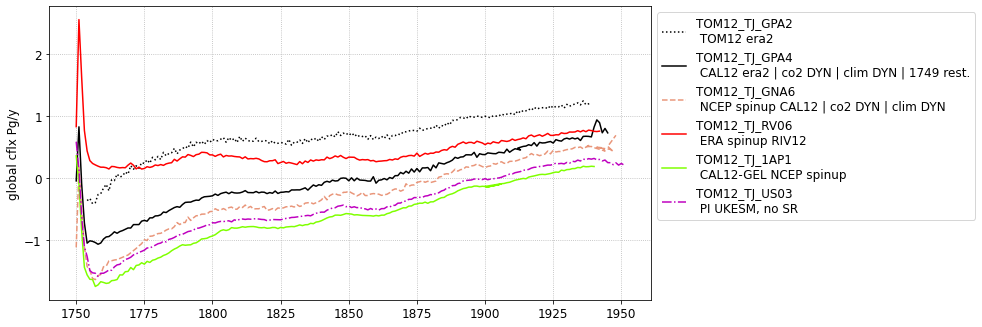

In [5]:
models = ['TOM12_TJ_GPA2','TOM12_TJ_GPA4','TOM12_TJ_GNA6' ,'TOM12_TJ_RV06','TOM12_TJ_1AP1','TOM12_TJ_US03',\
       ]

tvar = 'Cflx_total'
ttit = 'Cflx, pgC_yr'

plt.figure()


fact = 0.9
fig, axs = plt.subplots(1,1, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

ind = 0
for i in range(0,len(models)):
    tmod = models[i]
    print(tmod)
    
    tdat = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns//{tmod}/breakdown.sur.annual.dat', sep='\t')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']

    tdat = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns//{tmod}/breakdown.sur.annual.dat', sep='\t')
    year = tdat.year[2:].to_numpy().astype(float)
    Cflx_total = tdat.Cflx[2:].to_numpy().astype(float)
    filt = (year>1700)
    axs.plot(year[filt],Cflx_total[filt], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')

    axs.legend(ncol = 1, bbox_to_anchor = [1, 1])
    axs.set_ylabel('global cflx Pg/y')
    axs.grid(linestyle = ':')


TOM12_TJ_GEA1
TOM12_TJ_GEB1
TOM12_TJ_GEC1
TOM12_TJ_GED1
TOM12_TJ_GEA0
TOM12_TJ_GEB0
TOM12_TJ_GEC0
TOM12_TJ_GED0
TOM12_TJ_RVA0
TOM12_TJ_RVB0
TOM12_TJ_RVC0
TOM12_TJ_RVD0


<Figure size 432x288 with 0 Axes>

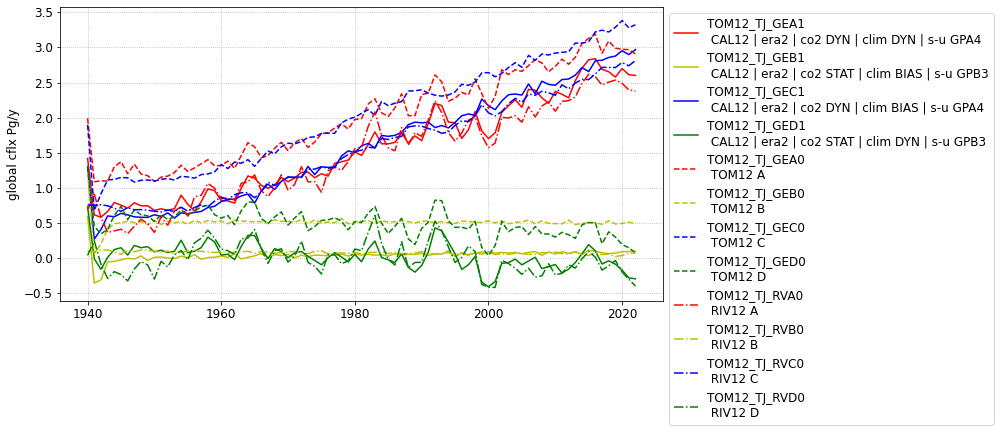

In [6]:
models = ['TOM12_TJ_GEA1','TOM12_TJ_GEB1','TOM12_TJ_GEC1' ,'TOM12_TJ_GED1',
          'TOM12_TJ_GEA0','TOM12_TJ_GEB0','TOM12_TJ_GEC0' ,'TOM12_TJ_GED0',
          'TOM12_TJ_RVA0','TOM12_TJ_RVB0','TOM12_TJ_RVC0' ,'TOM12_TJ_RVD0',
       ]

tvar = 'Cflx_total'
ttit = 'Cflx, pgC_yr'

plt.figure()


fact = 0.9
fig, axs = plt.subplots(1,1, figsize=(12*fact, 6*fact), facecolor='w', edgecolor='k')
# axs = axs.ravel()

ind = 0
for i in range(0,len(models)):
    tmod = models[i]
    print(tmod)
    
    tdat = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns//{tmod}/breakdown.sur.annual.dat', sep='\t')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']

    tdat = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns//{tmod}/breakdown.sur.annual.dat', sep='\t')
    year = tdat.year[2:].to_numpy().astype(float)
    Cflx_total = tdat.Cflx[2:].to_numpy().astype(float)
    filt = (year>1700)
    axs.plot(year[filt],Cflx_total[filt], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')

    axs.legend(ncol = 1, bbox_to_anchor = [1, 1])
    axs.set_ylabel('global cflx Pg/y')
    axs.grid(linestyle = ':')


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


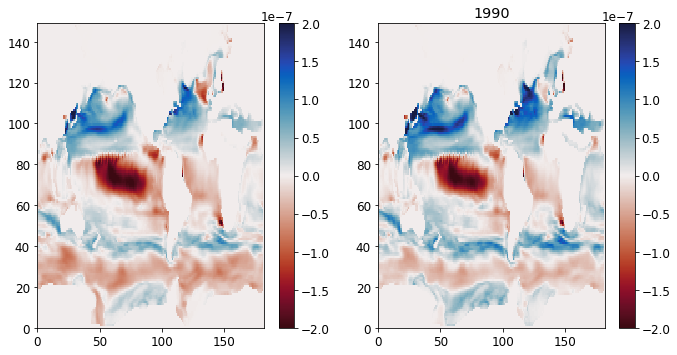

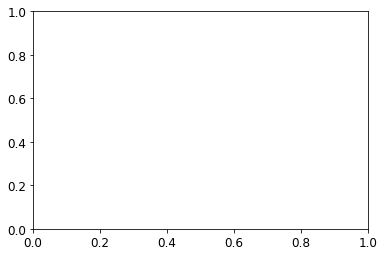

In [7]:

yr = 1990
tmod = 'TOM12_TJ_1ASA'
w = xr.open_dataset(f'/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_1ASA/ORCA2_1m_{yr}0101_{yr}1231_diad_T.nc')

fact = 0.7
fig, axs = plt.subplots(1,2, figsize=(16*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tmin = -2e-7
q = axs[0].pcolormesh(w.PICflx[0,:,:], vmin = tmin, vmax = np.abs(tmin), cmap = cm.balance_r)
plt.colorbar(q, ax = axs[0])
plt.title(yr)

plt.figure()
q =axs[1].pcolormesh(w.Cflx[0,:,:], vmin = tmin, vmax = np.abs(tmin), cmap = cm.balance_r)
plt.colorbar(q, ax = axs[1])

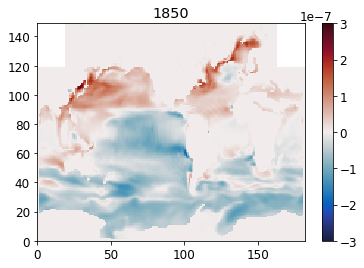

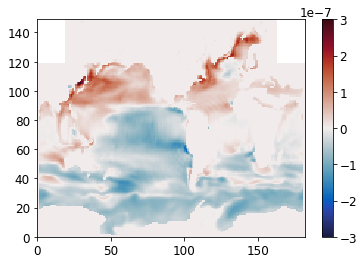

In [8]:

yr = 1850
w = xr.open_dataset(f'/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_GNA6/ORCA2_1m_{yr}0101_{yr}1231_diad_T.nc')

plt.figure()
tmin = -3e-7
q = plt.pcolormesh(w.PICflx[0,:,:], vmin = tmin, vmax = np.abs(tmin), cmap = cm.balance)
plt.colorbar(q)
plt.title(yr)

plt.figure()
q = plt.pcolormesh(w.Cflx[0,:,:], vmin = tmin, vmax = np.abs(tmin), cmap = cm.balance)
plt.colorbar(q)

In [9]:

# labs = ['GPB1 (const co2 v1, TOM12)','GPA2 (growing co2 v1, TOM12)',\
#         'TOM12_TJ_GPA4 (growing co2 v2, CAL12)','TOM12_TJ_GPB3 (const co2 v2, CAL12)']


tcsv = '/gpfs/home/mep22dku/scratch/MonitorRobot/summarycsv/'
for i in range(0,1):
    tmod = models[i]
    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']
    if i == 0:
        print(msum.columns)
    axs[ind].plot(msum.year,msum[tvar], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    axs[ind].legend(ncol = 1, bbox_to_anchor = [1, 1])
    axs[ind].axhline(y=0)
    axs[ind].axvline(x=1940)
    axs[ind].set_title(ttit)
    
    tmod = (mods[i])
    tdat = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns//{tmod}/breakdown.sur.annual.dat', sep='\t')
    year = tdat.year[2:].to_numpy().astype(float)
    Cflx_total = tdat.Cflx[2:].to_numpy().astype(float)
    plt.plot(year,Cflx_total, linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    #print(tdat)
    # plt.plot(year,Cflx_total, label = f'{labs[i]}' )
    plt.axvline(x=1939)
   
#plt.xlim([1940,1970])
plt.yticks(np.arange(-1,4,0.5))
plt.axhline(y = 0)
plt.grid()
    
plt.title('Cflx, Pg/yr')
plt.legend(bbox_to_anchor = [1,1], ncol = 2)

FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/home/mep22dku/scratch/MonitorRobot/summarycsv/TOM12_TJ_GEA1_breakdown.csv'

In [ ]:
# models = ['TOM12_TJ_GPA2','TOM12_TJ_GPA1','TOM12_TJ_GPB0','TOM12_TJ_GPB1',\
#          'TOM12_TJ_GNB0',
#          'TOM12_TJ_GEA0','TOM12_TJ_GEB0','TOM12_TJ_GEC0','TOM12_TJ_GED0',
#          'TOM12_DW_GA01','TOM12_DW_GB01','TOM12_DW_GC01','TOM12_DW_GD01',
#          ]

for i in range(0,len(models)):
    print(models[i])
    print(mod[models[i]])

## full globe carbon flux

In [ ]:
tmod = 'TOM12_DW_WE43'
msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
tcol = mod[tmod]['color']
tlin = mod[tmod]['linestyle']
tdesc = mod[tmod]['desc']

## full globe carbon flux, all available "A" simulations

In [ ]:
models = ['TOM12_TJ_GPA2',
            'TOM12_TJ_GEA0',
         'TOM12_TJ_CGA1',
          'TOM12_DW_WE43','TOM12_TJ_1ASA'
         ]

tvar = 'Cflx_total'
ttit = 'Cflx, pgC_yr'

tyear = 1900; tyear1 = 1750

fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
for i in range(0,len(models)):
    tmod = models[i]
    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']
    if i == 0:
        print(msum.columns)
    axs[ind].plot(msum.year,msum[tvar], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    axs[ind].legend(ncol = 1, bbox_to_anchor = [1, 1])
    axs[ind].axhline(y=0)
    axs[ind].axvline(x=1940)
    axs[ind].set_title(ttit)

ind = 1
for i in range(0,len(models)):
    tmod = models[i]
    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']
    axs[ind].plot(msum.year,msum[tvar], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    axs[ind].axhline(y=0)
    axs[ind].axvline(x=1940)
    axs[ind].set_xlim([1935,2023])
    axs[ind].set_ylim([-0.5,4])
    axs[ind].set_title(ttit)


## Southern Ocean cflx

In [ ]:
models = ['TOM12_TJ_GPA2',
            'TOM12_TJ_GEA0',
         'TOM12_DW_GA01',
          'TOM12_DW_WE43','TOM12_TJ_1ASA'
         ]

tvar = 'Cflx_SO'
ttit = 'S. Ocean Cflx, pgC_yr'

tyear = 1900; tyear1 = 1750

fact = 1.1
fig, axs = plt.subplots(2,1, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
for i in range(0,len(models)):
    tmod = models[i]
    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']
#     if i == 0:
#         print(msum.columns)
    axs[ind].plot(msum.year,msum[tvar], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    axs[ind].legend(ncol = 1, bbox_to_anchor = [1, 1])
    axs[ind].axhline(y=0)
    axs[ind].axvline(x=1940)
    axs[ind].set_title(ttit)

ind = 1
for i in range(0,len(models)):
    tmod = models[i]
    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']
    axs[ind].plot(msum.year,msum[tvar], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    axs[ind].axhline(y=0)
    axs[ind].axvline(x=1940)
    axs[ind].set_xlim([1935,2023])
    axs[ind].set_title(ttit)


In [ ]:
tyear = 2020; 
tit1 = 'Cflx full globe, simulations A-C and D-B {dynamic climate - static climate}'
tit2 = 'Cflx full globe, simulations A-D and C-B {co2 rising  - co2 static}'

tvar = 'Cflx_total'
ttit = 'Cflx, pgC_yr'

def get_plotdat(tmod,tmod2, tyear):

    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    toplot = msum[msum['year'] < tyear] 

    msum2 = pd.read_csv(f'{tcsv}{tmod2}_breakdown.csv')
    toplot2 = msum2[msum2['year'] < tyear] 
    return toplot, toplot2

fact = 0.9
fig, axs = plt.subplots(2,1, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
tlin = '-'; tcol = 'r'; tlab = 'GEA0-GEC0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GEA0','TOM12_TJ_GEC0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tcol = 'k'; tlab = 'GED0-GEB0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GED0','TOM12_TJ_GEB0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'r'; tlab = 'GA01-GC01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_TJ_CGA1','TOM12_TJ_CGC1',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'k'; tlab = 'GD01-GB01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_TJ_CGD1','TOM12_TJ_CGB1',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)

axs[ind].legend()
axs[ind].set_title(tit1)


ind = 1
tlin = '-'; tcol = 'r'; tlab = 'GEA0-GED0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GEA0','TOM12_TJ_GED0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tcol = 'k'; tlab = 'GEC0-GEB0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GEC0','TOM12_TJ_GEB0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'r'; tlab = 'GA01-GD01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_TJ_CGA1','TOM12_TJ_CGD1',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'k'; tlab = 'GC01-GB01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_TJ_CGC1','TOM12_TJ_CGB1',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
axs[ind].legend()
axs[ind].set_title(tit2)

In [ ]:

tit1 = 'Cflx S. Ocean, simulations A-C and D-B {dynamic climate - static climate}'
tit2 = 'Cflx S. Ocean, simulations A-D and C-B {co2 rising  - co2 static}'

tvar = 'Cflx_SO'
ttit = 'Cflx, pgC_yr'

def get_plotdat(tmod,tmod2, tyear):

    msum = pd.read_csv(f'{tcsv}{tmod}_breakdown.csv')
    toplot = msum[msum['year'] < tyear] 

    msum2 = pd.read_csv(f'{tcsv}{tmod2}_breakdown.csv')
    toplot2 = msum2[msum2['year'] < tyear] 
    return toplot, toplot2

fact = 0.9
fig, axs = plt.subplots(2,1, figsize=(12*fact, 10*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
tlin = '-'; tcol = 'r'; tlab = 'GEA0-GEC0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GEA0','TOM12_TJ_GEC0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tcol = 'k'; tlab = 'GED0-GEB0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GED0','TOM12_TJ_GEB0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'r'; tlab = 'GA01-GC01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_TJ_CGA1','TOM12_TJ_CGC1',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'k'; tlab = 'GD01-GB01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_TJ_CGD1','TOM12_TJ_CGB1',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)

axs[ind].legend()
axs[ind].set_title(tit1)


ind = 1
tlin = '-'; tcol = 'r'; tlab = 'GEA0-GED0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GEA0','TOM12_TJ_GED0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tcol = 'k'; tlab = 'GEC0-GEB0 (era, GCB 2023)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GEC0','TOM12_TJ_GEB0',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'r'; tlab = 'GA01-GD01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_TJ_CGA1','TOM12_TJ_CGD1',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
tlin = ':'; tcol = 'k'; tlab = 'GC01-GB01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_TJ_CGC1','TOM12_TJ_CGB1',tyear)
axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar], \
              linestyle = tlin, color = tcol, label = tlab)
axs[ind].legend()
axs[ind].set_title(tit2)

axs[0].axhline(y=0)
axs[1].axhline(y=0)

In [ ]:
tlin = ':'; tcol = 'r'; tlab = 'GA01-GD01 (ncep, GCB 2022)'
toplot, toplot2 = get_plotdat('TOM12_TJ_GEA0','TOM12_TJ_GED0',tyear)
tv = toplot.Cflx_total - toplot2.Cflx_total 
print(tv[50])
toplot.year[50]
#axs[ind].plot(toplot.year,toplot[tvar] - toplot2[tvar])

In [ ]:

    
dstdir = 'TOM12_TJ_CGB1'
srcdir = 'TOM12_DW_GB01'
w = glob.glob(f'/gpfs/data/greenocean/software/runs/{srcdir}/*ptrc*')
for i in range(0,len(w)):
    src = w[i]
    x = src.split("ORCA2")
    tv = f'ORCA2{x[1]}'
    dst = f'/gpfs/data/greenocean/software/runs/{dstdir}/{tv}'
    try:
        os.symlink(src,dst)
    except:
        pass
w = glob.glob(f'/gpfs/data/greenocean/software/runs/{srcdir}/*diad*')
for i in range(0,len(w)):
    src = w[i]
    x = src.split("ORCA2")
    tv = f'ORCA2{x[1]}'
    dst = f'/gpfs/data/greenocean/software/runs/{dstdir}/{tv}'
    try:
        os.symlink(src,dst)
    except:
        pass

dstdir = 'TOM12_TJ_CGC1'
srcdir = 'TOM12_DW_GC01'
w = glob.glob(f'/gpfs/data/greenocean/software/runs/{srcdir}/*ptrc*')
for i in range(0,len(w)):
    src = w[i]
    x = src.split("ORCA2")
    tv = f'ORCA2{x[1]}'
    dst = f'/gpfs/data/greenocean/software/runs/{dstdir}/{tv}'
    try:
        os.symlink(src,dst)
    except:
        pass
w = glob.glob(f'/gpfs/data/greenocean/software/runs/{srcdir}/*diad*')
for i in range(0,len(w)):
    src = w[i]
    x = src.split("ORCA2")
    tv = f'ORCA2{x[1]}'
    dst = f'/gpfs/data/greenocean/software/runs/{dstdir}/{tv}'
    try:
        os.symlink(src,dst)
    except:
        pass
    
dstdir = 'TOM12_TJ_CGD1'
srcdir = 'TOM12_DW_GD01'
w = glob.glob(f'/gpfs/data/greenocean/software/runs/{srcdir}/*ptrc*')
for i in range(0,len(w)):
    src = w[i]
    x = src.split("ORCA2")
    tv = f'ORCA2{x[1]}'
    dst = f'/gpfs/data/greenocean/software/runs/{dstdir}/{tv}'
    try:
        os.symlink(src,dst)
    except:
        pass
w = glob.glob(f'/gpfs/data/greenocean/software/runs/{srcdir}/*diad*')
for i in range(0,len(w)):
    src = w[i]
    x = src.split("ORCA2")
    tv = f'ORCA2{x[1]}'
    dst = f'/gpfs/data/greenocean/software/runs/{dstdir}/{tv}'
    try:
        os.symlink(src,dst)
    except:
        pass
# edir = '/gpfs/data/greenocean/software/resources/MetProcessed/MET_forcing/'

In [ ]:
plt.figure()
mods = ['TOM12_ET_PIHQ','TOM12_ET_PIHT','TOM12_ET_PIHM','TOM12_ET_PIHR']

for i in range(0,len(mods)):
    tmod = (mods[i])
#     filt = moddesc['model'] == tmod
#     tdesc = (moddesc.description[filt].values[0])
    #print(f'{tmod}, {tdesc}')
    
    tdat = pd.read_csv(f'/gpfs/data/greenocean/software/runs/{tmod}/breakdown.sur.annual.dat', sep='\t')
    year = tdat.year[2:].to_numpy().astype(float)
    Cflx_total = tdat.Cflx[2:].to_numpy().astype(float)
    #print(tdat)
    plt.plot(year,Cflx_total, label = f'{tmod}' )
    
plt.title('Cflx, Pg/yr')
plt.legend()

In [ ]:
plt.figure()
mods = ['TOM12_TJ_GPB1','TOM12_TJ_GPA2','TOM12_TJ_GPA4','TOM12_TJ_GPB3',
       'TOM12_TJ_GEA0','TOM12_TJ_GEB0','TOM12_TJ_GEC0','TOM12_TJ_GED0',
        'TOM12_TJ_GEA1','TOM12_TJ_GEB1','TOM12_TJ_GEC1','TOM12_TJ_GED1',
       ]
# labs = ['GPB1 (const co2 v1, TOM12)','GPA2 (growing co2 v1, TOM12)',\
#         'TOM12_TJ_GPA4 (growing co2 v2, CAL12)','TOM12_TJ_GPB3 (const co2 v2, CAL12)']


for i in range(0,len(mods)):
    
    tmod = mods[i]
    tcol = mod[tmod]['color']
    tlin = mod[tmod]['linestyle']
    tdesc = mod[tmod]['desc']
    if i == 0:
        print(msum.columns)
    axs[ind].plot(msum.year,msum[tvar], linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    axs[ind].legend(ncol = 1, bbox_to_anchor = [1, 1])
    axs[ind].axhline(y=0)
    axs[ind].axvline(x=1940)
    axs[ind].set_title(ttit)
    
    tmod = (mods[i])
    tdat = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns//{tmod}/breakdown.sur.annual.dat', sep='\t')
    year = tdat.year[2:].to_numpy().astype(float)
    Cflx_total = tdat.Cflx[2:].to_numpy().astype(float)
    plt.plot(year,Cflx_total, linestyle = tlin, color = tcol, label = f'{tmod} \n {tdesc}')
    #print(tdat)
    # plt.plot(year,Cflx_total, label = f'{labs[i]}' )
    plt.axvline(x=1939)
   
plt.xlim([1940,1970])
plt.yticks(np.arange(-1,1.2,0.2))
plt.axhline(y = 0)
plt.grid()
    
plt.title('Cflx, Pg/yr')
plt.legend(bbox_to_anchor = [1,1])

In [ ]:
plt.figure()
mods = ['TOM12_TJ_GPB3']
labs = ['GPB1 (const co2 v1, TOM12)']
for i in range(0,len(mods)):
    tmod = (mods[i])
    tdat = pd.read_csv(f'/gpfs/home/mep22dku/scratch/ModelRuns//{tmod}/breakdown.sur.annual.dat', sep='\t')
    year = tdat.year[2:].to_numpy().astype(float)
    Cflx_total = tdat.Cflx[2:].to_numpy().astype(float)
    filt = (year>1935) & (year< 1942)
    plt.plot(year[filt],Cflx_total[filt], label = f'{labs[i]}' )

In [ ]:
tdat[tdat.year > 1939]